# Credit Score Movement Prediction - Model Training and Insights

In [2]:
import sys
import os

# Get the parent directory of the notebook folder
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.data.feature_engineering import FeatureEngineer
from src.models.model_trainer import ModelTrainer
import shap

## Load and Preprocess Data

In [4]:
# Load raw data
df = pd.read_csv('../src/data/credit_score_dataset.csv')

# Feature engineering
engineer = FeatureEngineer()
X_processed, y, preprocessor = engineer.prepare_data(df)

# Save processed data
processed_df = pd.DataFrame(X_processed, columns=engineer.get_feature_names(preprocessor))
processed_df['target'] = y
processed_df.to_csv('../src/data/processed_dataset.csv', index=False)

## Model Training and Evaluation

In [5]:
# Initialize model trainer
trainer = ModelTrainer()

# Prepare data
X_train, X_test, y_train, y_test = trainer.prepare_data(processed_df)

# Train model with SMOTE
model = trainer.train_model(X_train, y_train)

# Evaluate model
metrics = trainer.evaluate_model(X_test, y_test)

## Model Performance Analysis

In [9]:
# Display performance metrics
print("Model Performance:")
print(f"Accuracy: {metrics['accuracy']:.4f}")
print(f"F1 Score (macro): {metrics['f1_score']:.4f}")
formatted = {k: f"{v:.4f}" for k, v in metrics['class_wise_recall'].items()}

print(f"Class-wise recall: {formatted}")

Model Performance:
Accuracy: 0.9670
F1 Score (macro): 0.9235
Class-wise recall: {'decrease': '0.8889', 'increase': '0.9957', 'stable': '0.9703'}


## Feature Importance Analysis

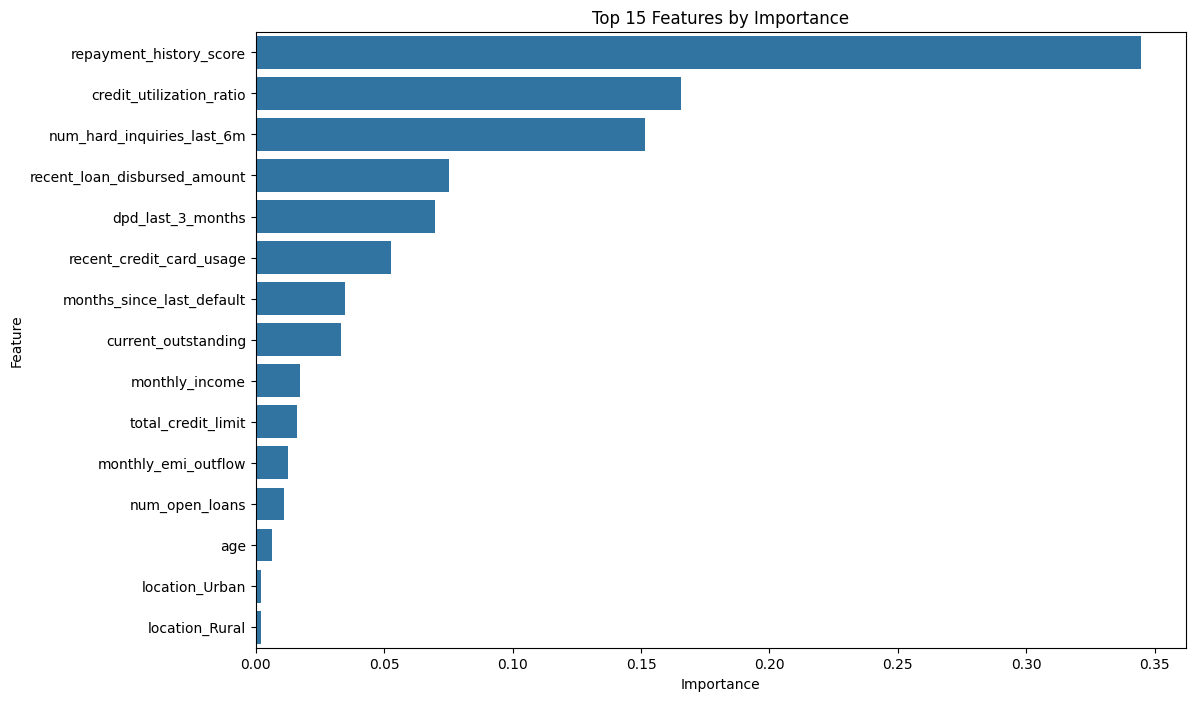

In [10]:
# Get feature importance
feature_importance = trainer.get_feature_importance(processed_df.columns[:-1])

# Plot top features
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
plt.title('Top 15 Features by Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Business Insights and Recommendations

### High-Risk Segments
Based on our analysis, customers who are at high risk of credit score decrease have the following characteristics:
1. High debt-to-income ratio (monthly_emi_outflow > 0.5 * monthly_income)
2. High credit utilization (> 80%)
3. Recent high credit card usage
4. Multiple hard inquiries in last 6 months
5. Recent defaults or late payments

### Opportunity Segments
Customers with potential for credit score improvement:
1. Good repayment history (repayment_history_score > 80)
2. Low debt-to-income ratio (< 0.3)
3. Moderate credit utilization (< 30%)
4. No recent credit inquiries
5. No recent defaults

### Policy Recommendations
1. For High-Risk Customers:
   - Implement credit counseling programs
   - Offer debt consolidation options
   - Provide financial literacy training
   - Monitor and alert on high credit utilization

2. For Opportunity Customers:
   - Consider credit limit increases
   - Offer loyalty rewards for good behavior
   - Provide personalized financial advice
   - Streamline loan application process

3. General Recommendations:
   - Implement early warning system for at-risk customers
   - Create tiered credit limit system
   - Offer flexible repayment options
   - Monitor and analyze customer behavior patterns